__Problem Statement:__

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

__Data:__
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

__Goals of the Case Study:__
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Step 1: Importing Data

In [176]:
# Code to Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [177]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

#set pandas option to display all the columns of a dataframe
pd.set_option('display.max_columns', None)

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [178]:
# Importing Leads dataset
lead_score=pd.read_csv("Leads.csv")

In [179]:
# Show sample data
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [180]:
lead_score.shape

(9240, 37)

In [181]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


__Observations:__ The following fields have outliers

TotalVisits,Total Time Spent on Website	,Page Views Per Visit

In [182]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 3: Data Preparation

In [183]:
#Converting Binary variables(Yes, No) to (0,1)
#List of variables to convert
varlist =  ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
lead_score[varlist] = lead_score[varlist].apply(binary_map)

lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [184]:
length_df=len(lead_score.columns)
for i in range(1,len(lead_score.columns)):
    print(lead_score.columns[i])
    print(lead_score[lead_score.columns[i]].value_counts())
    print("\n")

Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
583105    1
623906    1
646433    1
599326    1
605469    1
584702    1
593124    1
625433    1
630041    1
606491    1
654613    1
587028    1
603436    1
648494    1
588514    1
634175    1
600072    1
648518    1
636228    1
582611    1
613697    1
610311    1
621219    1
646449    1
593211    1
         ..
606893    1
592556    1
581511    1
631465    1
588008    1
611101    1
629414    1
625316    1
603543    1
600736    1
645790    1
645814    1
621242    1
590549    1
654026    1
598730    1
637650    1
615121    1
649936    1
613070    1
586443    1
639685    1
619195    1
635587    1
654018    1
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Le

__Observation:__
    1. All the below fields values of "Yes" and "No" are converted into 1 and 0
        1. 'Do Not Email'
        2. 'Do Not Call'
        3. 'Search'
        4. 'Magazine'
        5. 'Newspaper Article'
        6. 'X Education Forums'
        7. 'Newspaper'
        8. 'Digital Advertisement'
        9. 'Through Recommendations'
        10. 'Receive More Updates About Our Courses'
        11. 'Update me on Supply Chain Content'
        12. 'Get updates on DM Content'
        13. 'I agree to pay the amount through cheque'
        14. 'A free copy of Mastering The Interview'
    2. 'Prospect ID' and 'Lead Number' have unique values. Now to check if both have unique values for each row.
    3. The following four fields have "Select" as one of the value for some of the rows. Need to change them to Null
        1. Specialization
        2. How did you hear about X Education
        3. Lead Profile
        4. City

In [185]:
#To find if any duplicate values are present in Prospect ID & Lead Number as it is unique identifier for each row
sum(lead_score.duplicated(subset = 'Prospect ID')) == 0

True

In [186]:
sum(lead_score.duplicated(subset = 'Lead Number')) == 0

True

__Observation:__
    
    Both Prospect ID and Lead Number don't have duplicate values in it. Hence they are unique for each row.

In [187]:
#Converting all the Select values in field to NaN as it will no add any value up on analysis.
#The values might be received as "Select" as while entering the filed might not be mandatory and its a default value
lead_score=lead_score.replace('Select',np.nan)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [188]:
length_df=len(lead_score.columns)
for i in range(1,len(lead_score.columns)):
    print(lead_score.columns[i])
    print(lead_score[lead_score.columns[i]].value_counts(dropna=False))
    print("\n")

Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
583105    1
623906    1
646433    1
599326    1
605469    1
584702    1
593124    1
625433    1
630041    1
606491    1
654613    1
587028    1
603436    1
648494    1
588514    1
634175    1
600072    1
648518    1
636228    1
582611    1
613697    1
610311    1
621219    1
646449    1
593211    1
         ..
606893    1
592556    1
581511    1
631465    1
588008    1
611101    1
629414    1
625316    1
603543    1
600736    1
645790    1
645814    1
621242    1
590549    1
654026    1
598730    1
637650    1
615121    1
649936    1
613070    1
586443    1
639685    1
619195    1
635587    1
654018    1
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Le

__Observation:__
    
    Now all the "Select" has been converted into NAN

In [189]:
# To find list of field with Null values in number of rows
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [190]:
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

__Observation:__
    Most of the fields have Nulls in it. Among the fields, it seems like the following fields have higher percentage of missing values
        1. How did you hear about X Education
        2. Lead Quality
        3. Lead Profile
        4. Asymmetrique Activity Index
        5. Asymmetrique Profile Index
        6. Asymmetrique Activity Score
        7. Asymmetrique Profile Score
    Hence by considering not loosing much information choosing 45% as cut off value

In [191]:
#Dropping columns where % of Null is greater than 45.
columns=lead_score.columns

for field in columns:
    if((100*(lead_score[field].isnull().sum()/len(lead_score.index))) >= 45):
        lead_score.drop(field, 1, inplace = True)
        
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [192]:
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

__Observation:__
    The following fields seems to have NaN. Hence need to do some imputation or dropping the same to make data clear for analysis. Need to analyze each and every field and take decision accordingly
    1. Lead Source
    2. Country
    3. Specialization
    4. How did you hear about X Education
    5. What is your current occupation
    6. What matters most to you in choosing a course
    7. Lead Quality
    8. Lead Profile
    9. City
    10. Asymmetrique Activity Index
    11. Asymmetrique Profile Index
    12. Asymmetrique Activity Score
    13. Asymmetrique Profile Score
    14. TotalVisits
    15. Page Views Per Visit
    16. Last Activity

In [193]:
#1. Lead Source
lead_score['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
blog                    1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

__Observations:__
    On analysing the above data, it seems like, we can split into three categories such as Search Engine, Social Media & Others
    Hence Categorizing as follows.
    1. Google, google & bing under "Search Engines"
    2. Facebook & youtubechannel under "Social Media"
    3. All the others such as('Click2call','Press_Release','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat') including NaN are classifed as "Others"
    4. All the high values are left as it is

In [194]:
#Copy the field "Lead Source" to "Lead_Source_Comb"
lead_score['Lead_Source_Comb']=lead_score['Lead Source']
lead_score['Lead_Source_Comb'] = lead_score['Lead_Source_Comb'].replace(['google','Google','bing'],'Search Engines')
lead_score['Lead_Source_Comb'] = lead_score['Lead_Source_Comb'].replace(['Facebook','youtubechannel'],'Social Media')
lead_score['Lead_Source_Comb'] = lead_score['Lead_Source_Comb'].replace(np.nan,'Others')
lead_score['Lead_Source_Comb'] = lead_score['Lead_Source_Comb'].replace(['Click2call','Press_Release','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'] ,'Others')
lead_score.drop('Lead Source', 1, inplace = True)
lead_score['Lead_Source_Comb'].value_counts(dropna=False)

Search Engines      2879
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          58
Others                50
Name: Lead_Source_Comb, dtype: int64

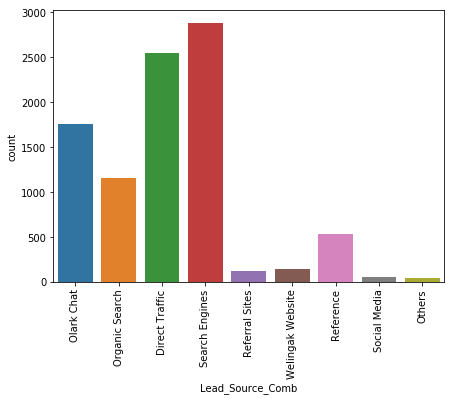

In [195]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['Lead_Source_Comb'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [196]:
#2. Country
lead_score['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Ghana                      2
China                      2
Philippines                2
Netherlands                2
Belgium                    2
Bangladesh                 2
Denmark                    1
Indonesia                  1
Switzerland                1
Kenya                      1
Vietnam                    1
Russia        

In [197]:
#Since India has total of 6492, hence we can impute India into NaN.
lead_score['Country'] = lead_score['Country'].replace(np.nan,'India')
#Calculating the % of values of each category
round(100*(lead_score['Country'].value_counts()/len(lead_score.index)),2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Germany                  0.04
Canada                   0.04
Nigeria                  0.04
South Africa             0.04
Kuwait                   0.04
Sweden                   0.03
Philippines              0.02
Belgium                  0.02
Italy                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Netherlands              0.02
Bangladesh               0.02
Ghana                    0.02
China                    0.02
Vietnam                  0.01
Tanzania                 0.01
Liberia                  0.01
Malaysia                 0.01
Kenya                    0.01
Russia    

In [198]:
#Changing all the other small count values with Others
lead_score['Country'].replace(['Hong Kong', 'Bahrain', 'France', 'Oman', 'unknown', 'Canada', 'South Africa', 'Kuwait', 'Germany',
'Nigeria', 'Sweden', 'China', 'Belgium', 'Uganda', 'Asia/Pacific Region', 'Netherlands', 'Ghana', 'Bangladesh', 'Italy', 'Philippines',
'Vietnam', 'Russia', 'Liberia', 'Kenya', 'Sri Lanka', 'Denmark', 'Switzerland', 'Malaysia', 'Tanzania', 'Indonesia'] ,'Others', inplace = True)
lead_score['Country'].value_counts() 

India                   8953
Others                    82
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Name: Country, dtype: int64

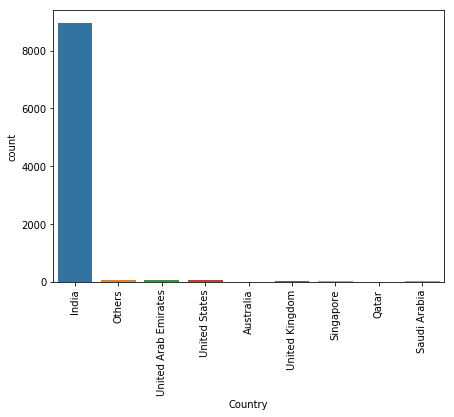

In [199]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['Country'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [200]:
#3. Specialization
lead_score['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

__Observation:__ NaN value in this field is either, the person entered the site can be a student or unemployed, so they might not have any specialization. Hence we can impute the "NaN" with "Others - NS". Since the count is high, we cannot dorp the field

In [201]:
#impute "Nan" with "Others-NS"
lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan,'Others-NS')
lead_score['Specialization'].value_counts(dropna=False)

Others-NS                            3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

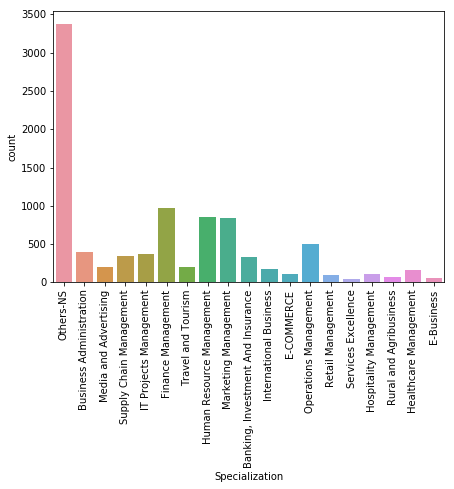

In [202]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['Specialization'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [203]:
#4. What is your current occupation
lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

__Observation:__ As per the above stats, it seems like Unemployed has higher count. Hence we can impute "NaN" as "Unemployed"

In [204]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan,'Unemployed')
lead_score['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

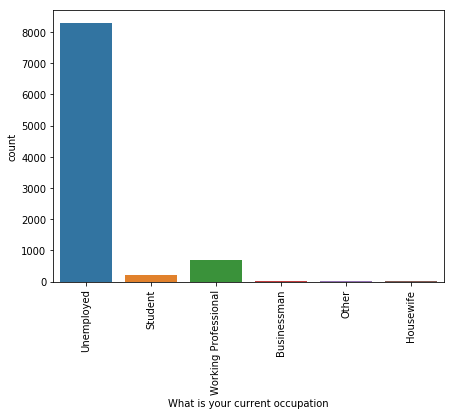

In [205]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['What is your current occupation'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

__Observation:__ From above, we can understand that the Working professional has higher chance of joining the course as it will be useful in their career.

In [206]:
#5. What matters most to you in choosing a course
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

__Observations:__ From above stats we can come to conclusion that "NaN" can be imputed with "Better Career Prospects" as all the course are designed for professionals for their better career prospects only

In [207]:
lead_score['What matters most to you in choosing a course'] = lead_score['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

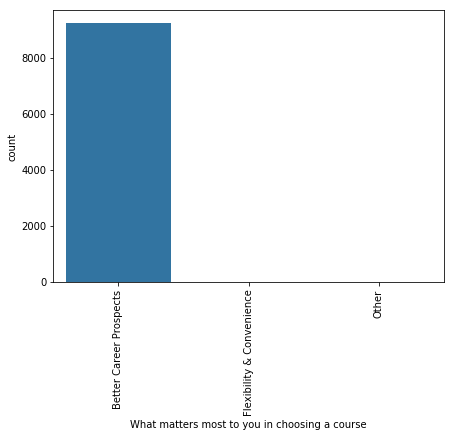

In [208]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['What matters most to you in choosing a course'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [209]:
#Calculating the % of values of each category
round(100*(lead_score['What matters most to you in choosing a course'].value_counts()/len(lead_score.index)),2)

Better Career Prospects      99.97
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

__Observation:__ As greater than 99% falls under the category of "Better Career Prospects", this field can be dropped

In [210]:
#dropping the field "What matters most to you in choosing a course"
lead_score.drop('What matters most to you in choosing a course', 1, inplace = True)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Source_Comb
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified,Olark Chat
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,Email Opened,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,NaN,0,0,Email Opened,Organic Search
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened,Direct Traffic
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified,Direct Traffic
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified,Search Engines


In [211]:
#6. Tags
lead_score['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

__Observation:__ In above case it seems to be not adding any value. Hence dropping hte field

In [212]:
#dropping the field "Tags" as it is not adding value to business
lead_score.drop('Tags', 1, inplace = True)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Source_Comb
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Modified,Olark Chat
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,Email Opened,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,NaN,0,0,Email Opened,Organic Search
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened,Direct Traffic
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Direct Traffic
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Search Engines


In [213]:
#7. City
lead_score['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

__Observation:__ As Mumbai seems to be more in terms of data, hence imputing NaN with "Mumbai"

In [214]:
lead_score['City']=lead_score['City'].replace(np.NaN,'Mumbai')
lead_score['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

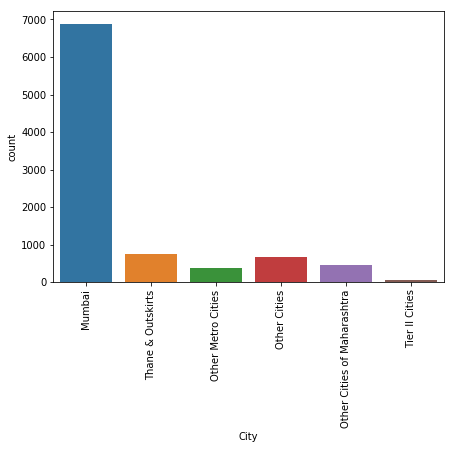

In [215]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['City'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [216]:
#8. Last Activity
lead_score['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

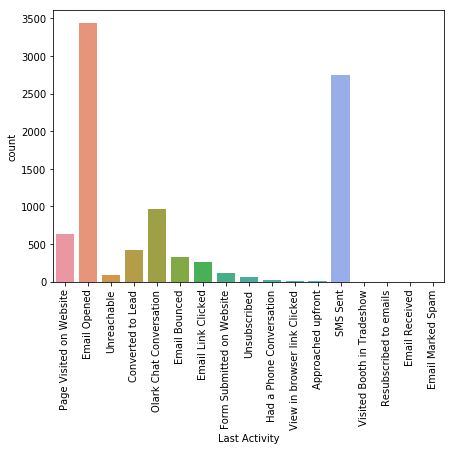

In [217]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(7,5))
s1=sns.countplot(lead_score['Last Activity'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

__Observation:__ All the less counts can be tagged under "Other" and also Nan can be tagged under NaN which can add value

In [218]:
lead_score['Last Activity']=lead_score['Last Activity'].replace(np.NaN,'Other')
lead_score['Last Activity']=lead_score['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Other')
lead_score['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other                         308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [219]:
#Checking % of missing values now
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

__Observation:__ Now all the Categorical values are imputed with required values. Now need to handle null values for Continous variables as well

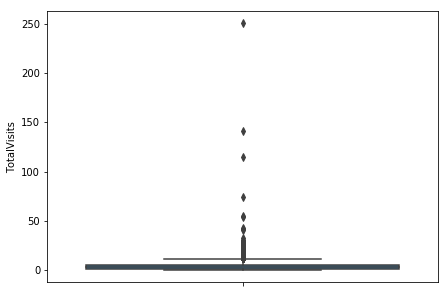

In [220]:
#Finding if any outliers exists in the field Total Visits
plt.figure(figsize=(7,5))
sns.boxplot(y=lead_score['TotalVisits'])
plt.show()

In [221]:
#Imputing NaN with Median values as there exists outliers in dataset
lead_score['TotalVisits'].replace(np.NaN, lead_score['TotalVisits'].median(), inplace =True)

From above it seems like the outliers exists in dataset. To find the % where the outlier exists

In [222]:
lead_score['TotalVisits'].describe(percentiles=[0.1,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

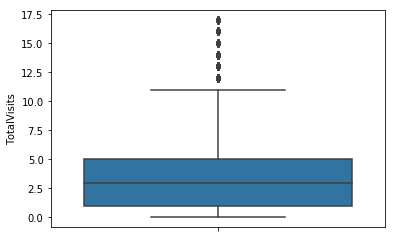

In [223]:
#Remove the data above 99% as they are outliers
lead_score = lead_score[(lead_score.TotalVisits <= lead_score.TotalVisits.quantile(0.99))]
sns.boxplot(y=lead_score['TotalVisits'])
plt.show()

In [224]:
lead_score.shape

(9157, 28)

__Observation:__ (9240-9157=83 records) are removed from dataset as part of outliers. Now all the outliers are removed from the field TotalVisits

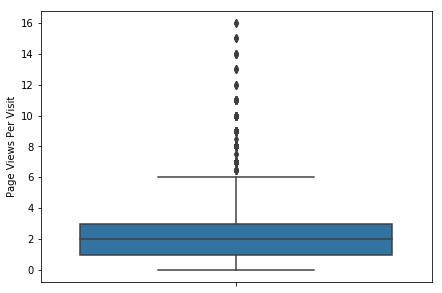

In [225]:
#Finding if any outliers exists in the field "Page Views Per Visit"
plt.figure(figsize=(7,5))
sns.boxplot(y=lead_score['Page Views Per Visit'])
plt.show()

In [226]:
#Imputing NaN with Median values as there exists outliers in dataset
lead_score['Page Views Per Visit'].replace(np.NaN, lead_score['Page Views Per Visit'].median(), inplace =True)

In [227]:
lead_score['Page Views Per Visit'].describe(percentiles=[0.1,.25, .5, .75, .90, .95, .99])

count    9157.000000
mean        2.332225
std         2.047285
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

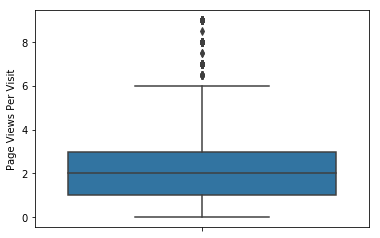

In [228]:
#Remove the data above 99% as they are outliers
lead_score = lead_score[(lead_score['Page Views Per Visit'] <= lead_score['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y=lead_score['Page Views Per Visit'])
plt.show()

In [229]:
lead_score.shape

(9090, 28)

__Observation:__ (9157-9090=67 records) are removed from dataset as part of outliers. Now all the outliers are removed from the field "Page Views Per Visit"

In [230]:
#Checking % of missing values now
round(100*(lead_score.isnull().sum()/len(lead_score.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

__Observation:__ Now all the fields are imputed with required values

In [231]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Source_Comb
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Olark Chat
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,Email Opened,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Email Opened,Organic Search
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened,Direct Traffic
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Other,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Direct Traffic
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Search Engines


In [232]:
#Creating Dummy variables for Categorical variables
dummy_df = pd.get_dummies(lead_score[['Lead Origin','Last Activity','Country','Specialization','What is your current occupation','City','Last Notable Activity','Lead_Source_Comb']], drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others-NS,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Source_Comb_Olark Chat,Lead_Source_Comb_Organic Search,Lead_Source_Comb_Others,Lead_Source_Comb_Reference,Lead_Source_Comb_Referral Sites,Lead_Source_Comb_Search Engines,Lead_Source_Comb_Social Media,Lead_Source_Comb_Welingak Website
0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [233]:
#Concatenating lead_score and dummy variables
lead_score = pd.concat([lead_score,dummy_df],1)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Source_Comb,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others-NS,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Source_Comb_Olark Chat,Lead_Source_Comb_Organic Search,Lead_Source_Comb_Others,Lead_Source_Comb_Reference,Lead_Source_Comb_Referral Sites,Lead_Source_Comb_Search Engines,Lead_Source_Comb_Social Media,Lead_Source_Comb_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,0,0,0,0.0,0,0.0,Page Visited on Website,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Olark Chat,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,0,0,0,5.0,674,2.5,Email Opened,India,Others-NS,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Email Opened,Organic Search,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Mumbai,0,1,Email Opened,Direct Traffic,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,0,0,0,1.0,305,1.0,Other,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,Modified,Direct Tra

In [234]:
#dropping actual variables and keepting only dummy variables
lead_score.drop(['Lead Origin','Last Activity','Country','Specialization','What is your current occupation','City','Last Notable Activity','Lead_Source_Comb'],1,inplace=True)
lead_score.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others-NS,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Source_Comb_Olark Chat,Lead_Source_Comb_Organic Search,Lead_Source_Comb_Others,Lead_Source_Comb_Reference,Lead_Source_Comb_Referral Sites,Lead_Source_Comb_Search Engines,Lead_Source_Comb_Social Media,Lead_Source_Comb_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [235]:
lead_score.shape

(9090, 91)

### Step 4: Test-Train Split

In [236]:
# Putting feature variable to X
X = lead_score.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others-NS,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Source_Comb_Olark Chat,Lead_Source_Comb_Organic Search,Lead_Source_Comb_Others,Lead_Source_Comb_Reference,Lead_Source_Comb_Referral Sites,Lead_Source_Comb_Search Engines,Lead_Source_Comb_Social Media,Lead_Source_Comb_Welingak Website
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [237]:
# Putting response variable to y
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [238]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [239]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Others,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others-NS,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead_Source_Comb_Olark Chat,Lead_Source_Comb_Organic Search,Lead_Source_Comb_Others,Lead_Source_Comb_Reference,Lead_Source_Comb_Referral Sites,Lead_Source_Comb_Search Engines,Lead_Source_Comb_Social Media,Lead_Source_Comb_Welingak Website
302,0,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6087,1,0,-1.094877,-0.887355,-1.206716,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1033,0,0,0.642022,-0.025151,1.477269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7656,1,0,0.989402,-0.241619,2.014065,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3241,0,0,0.294642,0.897591,-0.492776,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [240]:
### Checking the Converted Rate
converted_rate = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted_rate

38.448844884488445

__Observation:__ Converted Rate from dataset is 38.45%

### Step 6: Model Building

In [241]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           82
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2512.7
Date:                Mon, 20 Apr 2020   Deviance:                       5025.3
Time:                        19:00:11   Pearson chi2:                 6.69e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.6484   7.74e+04      0.000      1.000   -1.52e+05    1.52e+05
Do Not Email                                            -1.3154      0.212     -6.216      0.000      -1.730      -0.901
Do Not Call                                             22.7334   4.98e+04      0.000      1.000   -9.76e+04    9.76e+04
TotalVisits                                              0.2516      0.052      4.836      0.000       0.150       0.354
Total Time Spent on Website                              1.0771      0.041     26.036      0.000       0.996       1.158
Page Views Per Visit                                    -0.2308      0.059     -3.941      0.000      -0.346      -0.116
Search                                                   0.4027      0.862      0.467      0.640      -1.286       2.092
Magazine                                              -1.69e-09   1.29e-05     -0.000      1.000   -2.54e-05    2.54e-05
Newspaper Article                                       25.5402   8.43e+04      0.000      1.000   -1.65e+05    1.65e+05
X Education Forums                                    -1.31e-09   9.78e-06     -0.000      1.000   -1.92e-05    1.92e-05
Newspaper                                              -25.0603   7.25e+04     -0.000      1.000   -1.42e+05    1.42e+05
Digital Advertisement                                   -0.1744      1.305     -0.134      0.894      -2.733       2.384
Through Recommendations                                 22.0174   3.69e+04      0.001      1.000   -7.24e+04    7.24e+04
Receive More Updates About Our Courses               -3.861e-09    7.4e-06     -0.001      1.000   -1.45e-05    1.45e-05
Update me on Supply Chain Content                     6.094e-09   1.35e-05      0.000      1.000   -2.65e-05    2.65e-05
Get updates on DM Content                            -3.538e-09   1.05e-05     -0.000      1.000   -2.06e-05    2.06e-05
I agree to pay the amount through cheque              2.814e-09   5.86e-06      0.000      1.000   -1.15e-05    1.15e-05
A free copy of Mastering The Interview                  -0.1861      0.114     -1.631      0.103      -0.410       0.037
Lead Origin_Landing Page Submission                     -0.8323      0.143     -5.821      0.000      -1.113      -0.552
Lead Origin_Lead Add Form                                2.8558      1.162      2.458      0.014       0.579       5.133
Lead Origin_Lead Import                                 -0.9502      1.350     -0.704      0.482      -3.597       1.697
Lead Origin_Quick Add Form                              21.7303   8.16e+04      0.000      1.000    -1.6e+05     1.6e+05
Last Activity_Email Bounced                             -0.1415      0.490     -0.289      0.773      -1.102       0.819
Last Activity_Em

__Observation:__ From above, it seems like most of the features have high probability. Hence going to use RFE to eliminate not required features

### Step 7: Feature Selection Using RFE

In [242]:
logreg = LogisticRegression()

In [243]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [244]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True])

In [245]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 20),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Search', False, 37),
 ('Magazine', False, 69),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 73),
 ('Newspaper', False, 10),
 ('Digital Advertisement', False, 58),
 ('Through Recommendations', False, 22),
 ('Receive More Updates About Our Courses', False, 70),
 ('Update me on Supply Chain Content', False, 72),
 ('Get updates on DM Content', False, 71),
 ('I agree to pay the amount through cheque', False, 74),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 53),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', False, 51),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submi

In [246]:
col = X_train.columns[rfe.support_]

In [247]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Country_India',
       'Country_Others', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'Specialization_Business Administration',
       'Sp

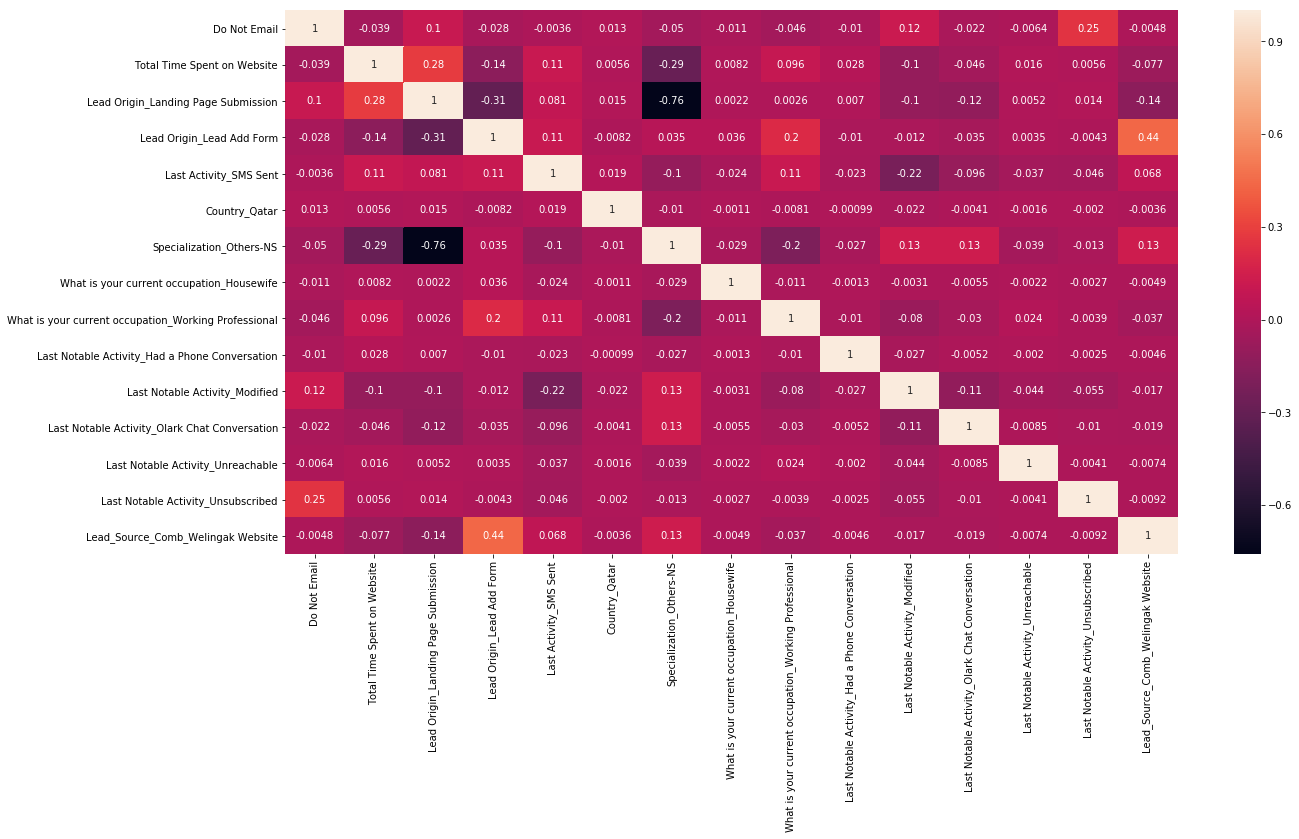

In [248]:
#Checking correlation between selected features
plt.figure(figsize = (20,10))
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

__Observation:__ From above it seems like none of the field correlation is much higher. Hence proceeding further with the model

##### Assessing the model with StatsModels

In [249]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.3
Date:                Mon, 20 Apr 2020   Deviance:                       5264.6
Time:                        19:00:20   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1308      0.118      1.107      0.268      -0.101       0.362
Do Not Email                                            -1.4400      0.181     -7.962      0.000      -1.795      -1.086
Total Time Spent on Website                              0.9717      0.037     26.536      0.000       0.900       1.043
Lead Origin_Landing Page Submission                     -1.3423      0.122    -11.023      0.000      -1.581      -1.104
Lead Origin_Lead Add Form                                2.8516      0.201     14.163      0.000       2.457       3.246
Last Activity_SMS Sent                                   1.3709      0.075     18.377      0.000       1.225       1.517
Country_Qatar                                          -23.6285   3.07e+04     -0.001      0.999   -6.02e+04    6.01e+04
Specialization_Others-NS                                -1.0509      0.123     -8.519      0.000      -1.293      -0.809
What is your current occupation_Housewife               24.0922    2.2e+04      0.001      0.999   -4.32e+04    4.32e+04
What is your current occupation_Working Professional     2.6546      0.192     13.862      0.000       2.279       3.030
Last Notable Activity_Had a Phone Conversation          23.9313    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
Last Notable Activity_Modified                          -0.9997      0.078    -12.739      0.000      -1.153      -0.846
Last Notable Activity_Olark Chat Conversation           -1.2483      0.320     -3.903      0.000      -1.875      -0.621
Last Notable Activity_Unreachable                        1.5707      0.602      2.608      0.009       0.390       2.751
Last Notable Activity_Unsubscribed                       1.2670      0.484      2.619      0.009       0.319       2.215
Lead_Source_Comb_Welingak Website                        3.1803      1.028      3.093      0.002       1.165       5.196
========================================================================================================================
"""

In [250]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.72
10,Last Notable Activity_Modified,1.67
6,Specialization_Others-NS,1.62
3,Lead Origin_Lead Add Form,1.51
4,Last Activity_SMS Sent,1.51
14,Lead_Source_Comb_Welingak Website,1.31
0,Do Not Email,1.20
8,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.14
13,Last Notable Activity_Unsubscribed,1.08


__Observation:__ From above it seems like the probability is much high for "Country_Qatar" and VIF seems to be 1. Hence dropping the same and proceed further with the model

In [251]:
col = col.drop('Country_Qatar',1)

In [252]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.8
Date:                Mon, 20 Apr 2020   Deviance:                       5271.5
Time:                        19:00:21   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1293      0.118      1.095      0.274      -0.102       0.361
Do Not Email                                            -1.4401      0.181     -7.971      0.000      -1.794      -1.086
Total Time Spent on Website                              0.9697      0.037     26.523      0.000       0.898       1.041
Lead Origin_Landing Page Submission                     -1.3443      0.122    -11.043      0.000      -1.583      -1.106
Lead Origin_Lead Add Form                                2.8507      0.201     14.162      0.000       2.456       3.245
Last Activity_SMS Sent                                   1.3693      0.075     18.371      0.000       1.223       1.515
Specialization_Others-NS                                -1.0509      0.123     -8.522      0.000      -1.293      -0.809
What is your current occupation_Housewife               24.0940    2.2e+04      0.001      0.999   -4.32e+04    4.32e+04
What is your current occupation_Working Professional     2.6568      0.191     13.878      0.000       2.282       3.032
Last Notable Activity_Had a Phone Conversation          23.9342    2.4e+04      0.001      0.999    -4.7e+04     4.7e+04
Last Notable Activity_Modified                          -0.9963      0.078    -12.701      0.000      -1.150      -0.843
Last Notable Activity_Olark Chat Conversation           -1.2458      0.320     -3.896      0.000      -1.872      -0.619
Last Notable Activity_Unreachable                        1.5736      0.602      2.614      0.009       0.393       2.754
Last Notable Activity_Unsubscribed                       1.2704      0.484      2.627      0.009       0.323       2.218
Lead_Source_Comb_Welingak Website                        3.1805      1.028      3.093      0.002       1.165       5.196
========================================================================================================================
"""

In [253]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.72
9,Last Notable Activity_Modified,1.67
5,Specialization_Others-NS,1.62
3,Lead Origin_Lead Add Form,1.51
4,Last Activity_SMS Sent,1.51
13,Lead_Source_Comb_Welingak Website,1.31
0,Do Not Email,1.20
7,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.14
12,Last Notable Activity_Unsubscribed,1.08


__Observation:__ From above it seems like the probability is much high for "What is your current occupation_Housewife" and VIF is 1. Hence dropping the same and proceed further with the model

In [254]:
col = col.drop('What is your current occupation_Housewife',1)

In [255]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.7
Date:                Mon, 20 Apr 2020   Deviance:                       5287.5
Time:                        19:00:21   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1355      0.118      1.150      0.250      -0.096       0.367
Do Not Email                                            -1.4445      0.181     -8.000      0.000      -1.798      -1.091
Total Time Spent on Website                              0.9689      0.037     26.541      0.000       0.897       1.040
Lead Origin_Landing Page Submission                     -1.3401      0.122    -11.028      0.000      -1.578      -1.102
Lead Origin_Lead Add Form                                2.8639      0.201     14.246      0.000       2.470       3.258
Last Activity_SMS Sent                                   1.3614      0.074     18.285      0.000       1.215       1.507
Specialization_Others-NS                                -1.0565      0.123     -8.580      0.000      -1.298      -0.815
What is your current occupation_Working Professional     2.6480      0.191     13.838      0.000       2.273       3.023
Last Notable Activity_Had a Phone Conversation          22.9237   1.45e+04      0.002      0.999   -2.85e+04    2.85e+04
Last Notable Activity_Modified                          -0.9923      0.078    -12.679      0.000      -1.146      -0.839
Last Notable Activity_Olark Chat Conversation           -1.2483      0.320     -3.904      0.000      -1.875      -0.622
Last Notable Activity_Unreachable                        1.5652      0.602      2.600      0.009       0.385       2.745
Last Notable Activity_Unsubscribed                       1.2671      0.484      2.621      0.009       0.319       2.215
Lead_Source_Comb_Welingak Website                        3.1679      1.028      3.081      0.002       1.152       5.183
========================================================================================================================
"""

__Observation:__ From above it seems like the probability is much high for "Last Notable Activity_Had a Phone Conversation". Hence dropping the same and proceed further with the model

In [256]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [257]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.7
Date:                Mon, 20 Apr 2020   Deviance:                       5301.4
Time:                        19:00:21   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1521      0.118      1.294      0.196      -0.078       0.383
Do Not Email                                            -1.4466      0.180     -8.015      0.000      -1.800      -1.093
Total Time Spent on Website                              0.9683      0.036     26.564      0.000       0.897       1.040
Lead Origin_Landing Page Submission                     -1.3441      0.121    -11.086      0.000      -1.582      -1.106
Lead Origin_Lead Add Form                                2.8598      0.201     14.226      0.000       2.466       3.254
Last Activity_SMS Sent                                   1.3528      0.074     18.190      0.000       1.207       1.499
Specialization_Others-NS                                -1.0673      0.123     -8.682      0.000      -1.308      -0.826
What is your current occupation_Working Professional     2.6407      0.191     13.798      0.000       2.266       3.016
Last Notable Activity_Modified                          -0.9998      0.078    -12.784      0.000      -1.153      -0.846
Last Notable Activity_Olark Chat Conversation           -1.2561      0.320     -3.928      0.000      -1.883      -0.629
Last Notable Activity_Unreachable                        1.5526      0.602      2.579      0.010       0.373       2.732
Last Notable Activity_Unsubscribed                       1.2589      0.483      2.604      0.009       0.311       2.206
Lead_Source_Comb_Welingak Website                        3.1719      1.028      3.085      0.002       1.156       5.187
========================================================================================================================
"""

__Observation:__ As per the observation all the features selected has low P values such less than 5%. Hence going to look for VIF to check for correlation if any

In [258]:
#Creating dataframe with coefficient values
final_model_data=pd.DataFrame(res.params, columns = [['coefficient']])
final_model_data

,coefficient
const,0.152117
Do Not Email,-1.446577
Total Time Spent on Website,0.968313
Lead Origin_Landing Page Submission,-1.344148
Lead Origin_Lead Add Form,2.859776
Last Activity_SMS Sent,1.352789
Specialization_Others-NS,-1.067349
What is your current occupation_Working Professional,2.640729
Last Notable Activity_Modified,-0.999774
Last Notable Activity_Olark Chat Conversation,-1.256142


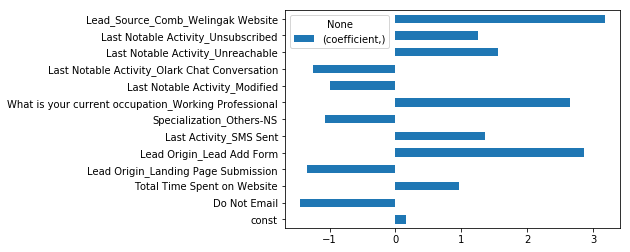

In [259]:
#Plotting coefficient values in bar plot
ax = final_model_data.plot.barh(y='coefficient', rot=0)

In [260]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.71
7,Last Notable Activity_Modified,1.67
5,Specialization_Others-NS,1.62
4,Last Activity_SMS Sent,1.51
3,Lead Origin_Lead Add Form,1.50
11,Lead_Source_Comb_Welingak Website,1.31
0,Do Not Email,1.20
6,What is your current occupation_Working Profes...,1.18
1,Total Time Spent on Website,1.14
10,Last Notable Activity_Unsubscribed,1.08


__Observation:__ Above table shows that all the VIF are less than 5. Hence there exists no correlation between selected features.

In [261]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.209096
6087    0.014474
1033    0.280984
7656    0.179494
3241    0.736898
5738    0.119977
7366    0.058732
3680    0.056815
4170    0.721467
43      0.160176
dtype: float64

In [262]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20909612, 0.01447402, 0.28098403, 0.17949373, 0.73689806,
       0.11997696, 0.05873199, 0.0568152 , 0.72146671, 0.16017608])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [263]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID
0,0,0.209096,302
1,0,0.014474,6087
2,0,0.280984,1033
3,0,0.179494,7656
4,1,0.736898,3241


In [264]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted
0,0,0.209096,302,0
1,0,0.014474,6087,0
2,0,0.280984,1033,0
3,0,0.179494,7656,0
4,1,0.736898,3241,1


In [265]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3508  427]
 [ 815 1613]]


In [266]:
# Predicted     not_churn    churn
# Actual
# not_churn        3508      427
# churn            815       1613  

In [267]:
#Finding the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8048090523338048


### Metrics beyond simply accuracy

In [268]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [269]:
# Finding sensitivity of our logistic regression model
TP / float(TP+FN)

0.664332784184514

In [270]:
# Finding calculate specificity
TN / float(TN+FP)

0.8914866581956798

In [271]:
# Finding  false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1085133418043202


In [272]:
# positive predictive value 
print (TP / float(TP+FP))

0.7906862745098039


In [273]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8114735137635901


### Step 8: Plotting the ROC Curve

In [274]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [275]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

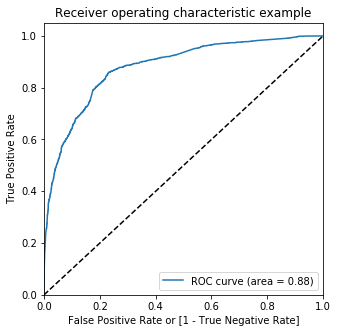

In [276]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

__Observation:__ ROC Value should be close to 1. Now in our model, we have got it as 0.88. So our model can be a good predictive model

### Step 9: Finding Optimal Cutoff Point

In [277]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209096,302,0,1,1,1,0,0,0,0,0,0,0
1,0,0.014474,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.280984,1033,0,1,1,1,0,0,0,0,0,0,0
3,0,0.179494,7656,0,1,1,0,0,0,0,0,0,0,0
4,1,0.736898,3241,1,1,1,1,1,1,1,1,1,0,0


In [278]:
# Now calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.593274  0.971170  0.360102
0.2   0.2  0.755147  0.893740  0.669632
0.3   0.3  0.802923  0.857908  0.768996
0.4   0.4  0.802137  0.746293  0.836595
0.5   0.5  0.804809  0.664333  0.891487
0.6   0.6  0.799309  0.599259  0.922745
0.7   0.7  0.785793  0.521417  0.948920
0.8   0.8  0.759705  0.412685  0.973825
0.9   0.9  0.716800  0.274300  0.989835


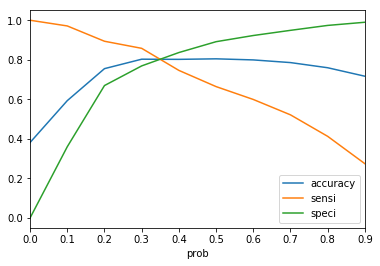

In [279]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [280]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.209096,302,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.014474,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.280984,1033,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.179494,7656,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.736898,3241,1,1,1,1,1,1,1,1,1,0,0,1


In [281]:
#Assigning Lead score between 0 and 100 based on Converted_Prob field
y_train_pred_final['Lead_Score'] = y_train_pred_final.converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['converted','converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,converted,converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.209096,302,0,21
1,0,0.014474,6087,0,1
2,0,0.280984,1033,0,28
3,0,0.179494,7656,0,18
4,1,0.736898,3241,1,74


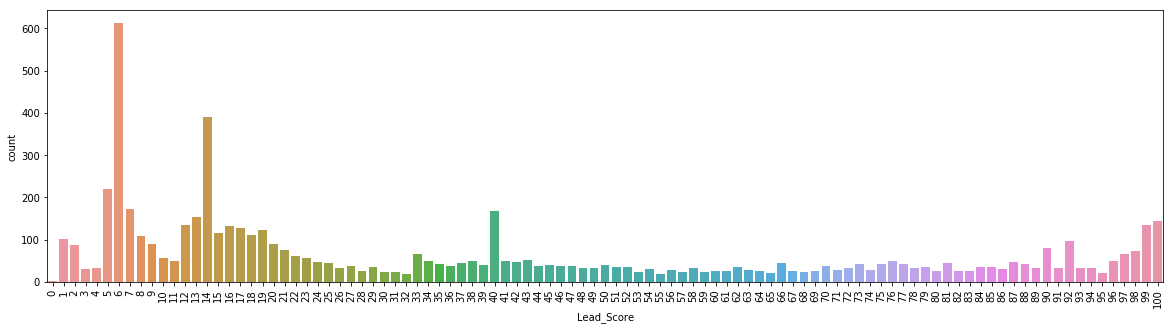

In [282]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(20,5))
s1=sns.countplot(y_train_pred_final['Lead_Score'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [283]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8033946251768034

In [284]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3065,  870],
       [ 381, 2047]], dtype=int64)

In [285]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [286]:
# Now the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8430807248764415

In [287]:
# Now the calculate specificity
TN / float(TN+FP)

0.7789072426937739

In [288]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.22109275730622618


In [289]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7017483716146726


In [290]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8894370284387696


In [291]:
## Precision and Recall

In [292]:
#Looking at the confusion matrix again

In [293]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion

array([[3065,  870],
       [ 381, 2047]], dtype=int64)

##### Precision
TP / TP + FP

In [294]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7017483716146726

Recall
TP / TP + FN

In [295]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8430807248764415

Using sklearn utilities for the same

In [296]:
precision_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7017483716146726

In [297]:
recall_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8430807248764415

In [298]:
### Precision and recall tradeoff

In [299]:
y_train_pred_final.converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       1
 9       0
 10      1
 11      0
 12      1
 13      0
 14      0
 15      0
 16      0
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      1
 26      1
 27      0
 28      1
 29      0
        ..
 6333    0
 6334    1
 6335    0
 6336    1
 6337    1
 6338    1
 6339    0
 6340    1
 6341    1
 6342    0
 6343    1
 6344    0
 6345    0
 6346    0
 6347    0
 6348    1
 6349    0
 6350    1
 6351    0
 6352    0
 6353    1
 6354    0
 6355    0
 6356    1
 6357    1
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: converted, Length: 6363, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       1
 9       0
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      1
 17      1
 18      1
 19      1
 20      1
 21      1
 22      0
 23      0
 24      0
 25      

In [300]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

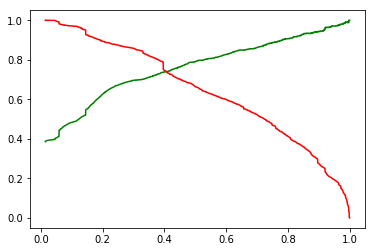

In [301]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test set

In [302]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [303]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_SMS Sent,Specialization_Others-NS,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Lead_Source_Comb_Welingak Website
6906,0,1.919395,1,0,1,0,0,0,0,0,0,0
1873,0,-0.546142,1,0,1,1,0,1,0,0,0,0
771,0,-0.797465,0,0,0,1,0,0,0,0,0,0
4495,0,-0.623190,1,0,0,0,0,0,0,0,0,0
9061,0,2.392690,1,0,0,0,0,1,0,0,0,0


In [304]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [305]:
y_test_pred = res.predict(X_test_sm)

In [306]:
y_test_pred[:10]

6906    0.882812
1873    0.080527
771     0.156114
4495    0.142403
9061    0.531227
4929    0.256001
2308    0.082969
1034    0.060122
9033    0.122246
7008    0.895576
dtype: float64

In [307]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [308]:
# Let's see the head
y_pred_1.head()

,0
6906,0.882812
1873,0.080527
771,0.156114
4495,0.142403
9061,0.531227


In [309]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [310]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [311]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [312]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [313]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.882812
1,0,1873,0.080527
2,0,771,0.156114
3,0,4495,0.142403
4,1,9061,0.531227


In [314]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_Prob'})

In [315]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','converted_Prob'], axis=1)

### Step 11: Assign Lead score based on converted Probability

In [316]:
#Adding Lead_Score field based on converted_Prob field
y_pred_final['Lead_Score'] = y_pred_final.converted_Prob.map( lambda x: round(x*100))

In [317]:
# head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,converted_Prob,Lead_Score
0,6906,1,0.882812,88
1,1873,0,0.080527,8
2,771,0,0.156114,16
3,4495,0,0.142403,14
4,9061,1,0.531227,53


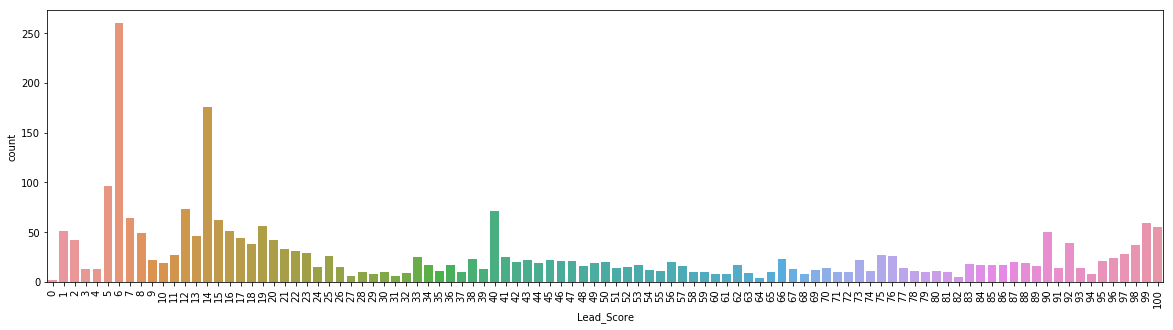

In [318]:
#Plotting the field as graph to show how the values are distributed
plt.figure(figsize=(20,5))
s1=sns.countplot(y_pred_final['Lead_Score'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [319]:
y_pred_final['final_predicted'] = y_pred_final.converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [320]:
y_pred_final.head()

,Prospect ID,Converted,converted_Prob,Lead_Score,final_predicted
0,6906,1,0.882812,88,1
1,1873,0,0.080527,8,0
2,771,0,0.156114,16,0
3,4495,0,0.142403,14,0
4,9061,1,0.531227,53,1


In [321]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7975797579757976

In [322]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1278,  382],
       [ 170,  897]], dtype=int64)

In [323]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [324]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8406747891283973

In [325]:
# Let us calculate specificity
TN / float(TN+FP)

0.7698795180722892

In [326]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7013291634089132

In [327]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8406747891283973

### Step 12: Comparing values between Train and Test data

__Observations:__

Train Data: 

    Accuracy : 80.34%
    Sensitivity : 84.31%
    Specificity : 77.89%

Test Data:

    Accuracy : 79.76% (~80%)
    Sensitivity : 84.07%
    Specificity : 76.99%